In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Name : 게임의 이름입니다.
# Platform : 게임이 지원되는 플랫폼의 이름입니다.
# Year : 게임이 출시된 연도입니다.
# Genre : 게임의 장르입니다.
# Publisher : 게임을 제작한 회사입니다.
# NA_Sales : 북미지역에서의 출고량입니다.
# EU_Sales : 유럽지역에서의 출고량입니다.
# JP_Sales : 일본지역에서의 출고량입니다.
# Other_Sales : 기타지역에서의 출고량입니다.

# 1.지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
# 2.연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
# 3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
# 4.다음 분기에 어떤 게임을 설계해야 할까

In [5]:
# 데이터 업로드
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/vgames2.csv', index_col=0)
df = data.copy()
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [6]:
# 결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
len(df)

16598

In [8]:
# 년도, 장르, 제작회사가 결측치인 행 제거(357개 제거)
df = df.dropna()
print(len(df))
print(16598-len(df))

16241
357


In [9]:
# 년도 데이터 탐색(년도 표기 기준이 다름)
year_list = [year for year in df.Year.unique()]
year_list

[2008.0,
 2009.0,
 2010.0,
 2005.0,
 2011.0,
 2007.0,
 2001.0,
 2003.0,
 2006.0,
 2014.0,
 2015.0,
 2002.0,
 1997.0,
 2013.0,
 1996.0,
 2004.0,
 2000.0,
 1984.0,
 1998.0,
 2016.0,
 1985.0,
 1999.0,
 9.0,
 97.0,
 1995.0,
 1993.0,
 2012.0,
 1987.0,
 1982.0,
 11.0,
 1994.0,
 1990.0,
 15.0,
 1992.0,
 1991.0,
 1983.0,
 1988.0,
 1981.0,
 3.0,
 1989.0,
 96.0,
 6.0,
 8.0,
 1986.0,
 1.0,
 5.0,
 4.0,
 10.0,
 98.0,
 7.0,
 16.0,
 86.0,
 14.0,
 95.0,
 2017.0,
 1980.0,
 2020.0,
 2.0,
 13.0,
 0.0,
 12.0,
 94.0]

# **데이터 전처리**

In [10]:
# 년도 표기 기준을 통일 시키기 위해 함수 작성
def re_year(year):
  if (year >= 22) and (year < 100):
    return '19' + str(year)
  elif (year >= 10) and (year < 23):
    return '20' + str(year)
  elif year < 10:
    return '200' + str(year)
  else:
    return str(year)

In [11]:
df['reyear'] = df['Year'].apply(re_year)
df['reyear']

1        2008.0
2        2009.0
3        2010.0
4        2010.0
5        2010.0
          ...  
16594    2006.0
16595    2005.0
16596    2015.0
16597    2013.0
16598    1996.0
Name: reyear, Length: 16241, dtype: object

In [12]:
# 북미 지역의 출고량 탐색(출고량 단위 다름)
df['NA_Sales'].unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '0.29',
       '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51', '60K',
       '0.13', '0.34', '0.25', '0.41', '0.52', '0.22', '0.35', '0.1',
       '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98', '0.09',
       '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23', '0.44',
       '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49', '0.62',
       '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53', '0.23',
       '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31', '1.03',
       '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69', '1.25',
       '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73', '0.55',
       '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44', '2.29',
       '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98', '0.75',
       '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68', '1.23M',
       

In [13]:
# 출고량 단위를 통일 시키기 위해 함수 작성
def unit_integration(value):
  if 'M' in value:
    return value[:-1]

  elif 'K' in value:
    re_value = float(value[:-1]) / 1000
    return str(re_value)

  else:
    return value

In [14]:
# 출고량 관련 전체 변수 단위 변환
columns= ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']
for column in columns:
  df['r_'+column] = df[column].apply(unit_integration)

df[df['NA_Sales'].str.contains('M|K')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,reyear,r_NA_Sales,r_EU_Sales,r_JP_Sales,r_Other_Sales
11,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06,2001.0,0.48,0.33,0.0,0.06
46,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03,2015.0,0.06,0.08,0.16,0.03
146,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0,2006.0,0.0,0.02,0,0
448,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58M,0.47,0.01,0.1,2012.0,0.58,0.47,0.01,0.1
459,F1 2010,PS3,2010.0,Racing,Codemasters,0.25M,0.76,0.08,0.27,2010.0,0.25,0.76,0.08,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16331,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19,2003.0,0.72,0.56,0,0.19
16409,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,0.53M,0.02,0,0.09,2005.0,0.53,0.02,0,0.09
16483,Super Robot Taisen F Kanketsuhen,SAT,98.0,Strategy,Banpresto,0M,0,0.55,0,1998.0,0,0,0.55,0
16493,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12,2012.0,0.47,0.18,0,0.12


In [31]:
# 데이터 타입 변환
df = df.astype({'r_NA_Sales':'float', 'r_EU_Sales':'float', 'r_JP_Sales':'float', 'r_Other_Sales':'float'})

# **문제1. 지역에 따라서 선호하는 게임 장르가 다를까**

In [166]:
# 집계함수를 통해 장르별 출고량 합계 계산
matter1 = df.groupby('Genre', as_index=False)['r_NA_Sales',	'r_EU_Sales',	'r_JP_Sales'].sum()
matter1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Genre,r_NA_Sales,r_EU_Sales,r_JP_Sales
0,Action,858.75,513.64,156.60
1,Adventure,101.79,63.66,51.87
2,Fighting,220.35,99.90,87.14
3,Misc,394.73,208.15,104.18
4,Platform,445.38,200.63,130.53


In [168]:
# 지역별 출고량 크기가 다르므로 전체 크기에서 지역별 출고량을 빼줌(스케일링)
# Action 장르는 북미, 유렵, 일본에서 모두 인기가 많지만 Role-Playing 장르는 북미와 유럽보다는 상대적으로 일본에서 인기가 많은 것을 확인할 수 있음
columns = ['r_NA_Sales',	'r_EU_Sales',	'r_JP_Sales']
for column in columns:
  matter1[column+'_ratio'] = round(matter1[column] / matter1[column].sum(), 2)

matter1.sample(5)

,Genre,r_NA_Sales,r_EU_Sales,r_JP_Sales,r_NA_Sales_ratio,r_EU_Sales_ratio,r_JP_Sales_ratio
0,Action,858.75,513.64,156.60,0.20,0.21,0.12
7,Role-Playing,318.76,183.09,342.93,0.07,0.08,0.27
6,Racing,354.70,235.02,56.32,0.08,0.10,0.04
1,Adventure,101.79,63.66,51.87,0.02,0.03,0.04
8,Shooter,574.48,310.23,38.18,0.13,0.13,0.03


# **문제2. 연도별 게임의 트렌가 있을까**

In [18]:
# 연도별 장르별 갯수를 집계
matter2 = pd.DataFrame(df.groupby(by=['reyear', 'Genre'])['Genre'].count().reset_index(name='count'))
matter2

,reyear,Genre,count
0,1980.0,Action,1
1,1980.0,Fighting,1
2,1980.0,Misc,4
3,1980.0,Shooter,2
4,1981.0,Action,25
...,...,...,...
383,2016.0,Sports,38
384,2016.0,Strategy,10
385,2017.0,Action,1
386,2017.0,Role-Playing,2


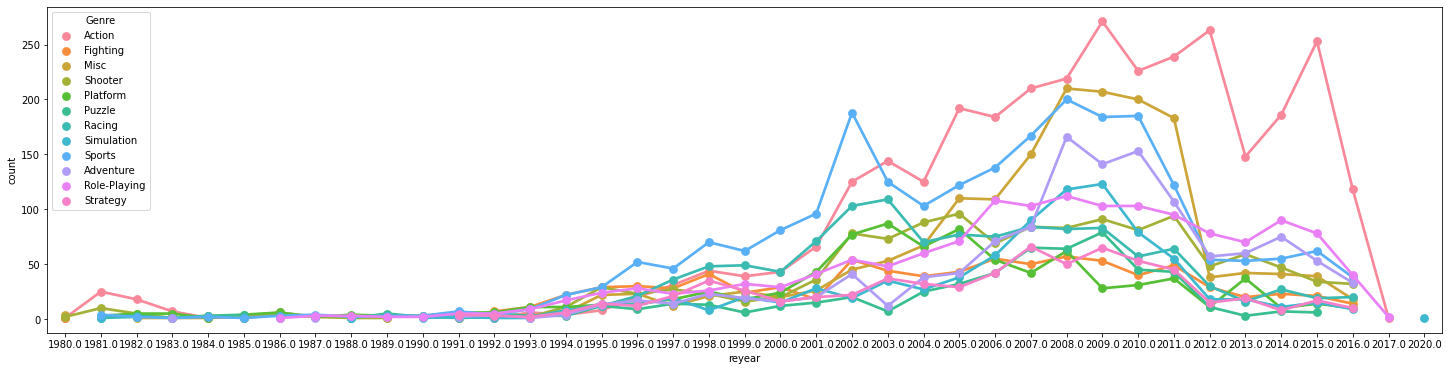

In [20]:
# 연도별 장르의 개수 시각화
# 97년도 이후 게임 산업이 급격하게 발전했으며 2002년까지는 sports 장르가 가장 인기가 많았지만 이후 Action 장르가 꾸준한 사랑을 받은 것을 확인할 수 있다

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(25,6))

sns.pointplot(data=matter2, x='reyear', y='count',hue='Genre', ax=ax, ci=None)
 
 
plt.show()

# **문제 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다**

In [43]:
# 북미, 유렵, 일본, 기타지역의 출고량을 합친 total sales 변수 생성
# 종합 출고량이 가장 큰 상위 5개 게임 출력(will sport, mario, pokemon)
df['total_sales'] = df['r_EU_Sales'] + df['r_JP_Sales'] + df['r_NA_Sales'] + df['r_Other_Sales']
df.sort_values(by='total_sales', ascending=False).iloc[:5]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,reyear,r_NA_Sales,r_EU_Sales,r_JP_Sales,r_Other_Sales,total_sales
2909,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,2006.0,41.49,29.02,3.77,8.46,82.74
4200,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,1985.0,29.08,3.58,6.81,0.77,40.24
12580,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,2008.0,15.85,12.88,3.79,3.31,35.83
3353,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,2009.0,15.75,11.01,3.28,2.96,33.00
7830,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1,1996.0,11.27,8.89,10.22,1.00,31.38


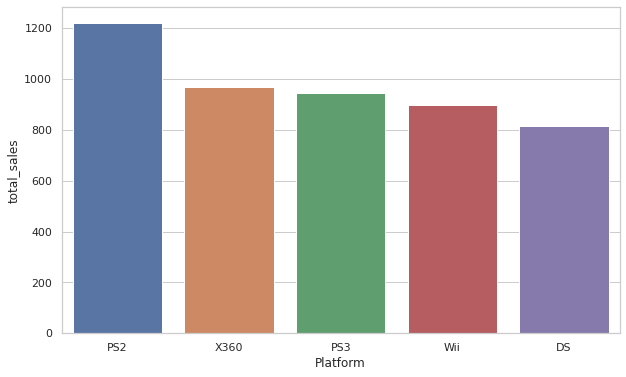

In [68]:
# 플랫폼별 출고량 상위 5개 시각화
matter3_1 = pd.DataFrame(df.groupby(by=['Platform'])['total_sales'].sum().sort_values(ascending=False).iloc[:5].reset_index())
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='Platform', y='total_sales', data=matter3_1)

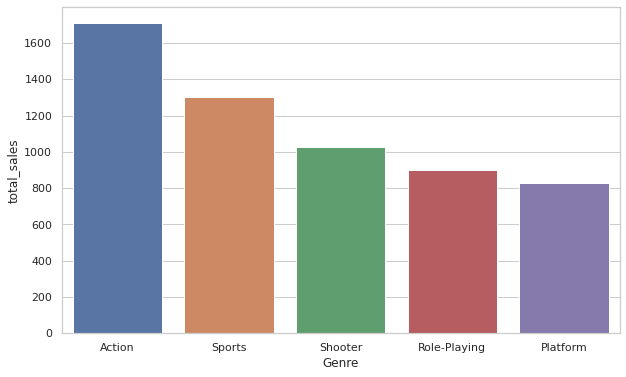

In [67]:
# 장르별 출고량 상위 5개 시각화
matter3_2 = pd.DataFrame(df.groupby(by=['Genre'])['total_sales'].sum().sort_values(ascending=False).iloc[:5].reset_index())
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='Genre', y='total_sales', data=matter3_2)

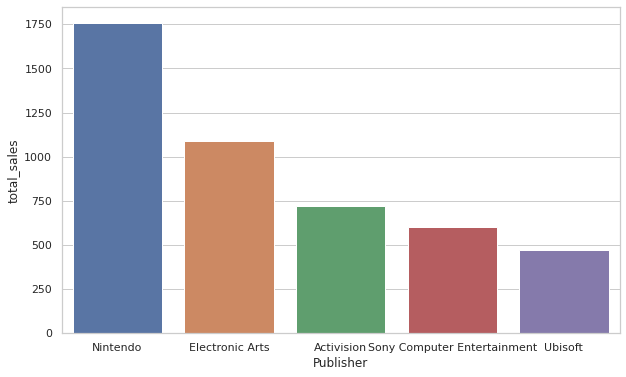

In [65]:
# 게임제작 회사별 출고량 상위 5개 시각화
matter3_3 = pd.DataFrame(df.groupby(by=['Publisher'])['total_sales'].sum().sort_values(ascending=False).iloc[:5].reset_index())
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='Publisher', y='total_sales', data=matter3_3)

# **다음 분기에 어떤 게임을 설계해야 할까**

In [116]:
# 가장 최신 데이터 3년치 사용(17년도와 20년도의 경우 샘플이 적기 때문에 제외)
recent_data = df[(df['reyear']=='2014.0') | (df['reyear']=='2015.0') | (df['reyear']=='2016.0')].reset_index(drop=True)
recent_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,reyear,r_NA_Sales,r_EU_Sales,r_JP_Sales,r_Other_Sales,total_sales
0,Hajime no Ippo: The Fighting! (2014),PS3,2014.0,Sports,Namco Bandai Games,0,0,0.03,0,2014.0,0.00,0.00,0.03,0.00,0.03
1,Grand Kingdom,PS4,2015.0,Role-Playing,Nippon Ichi Software,0.02,0,0.03,0,2015.0,0.02,0.00,0.03,0.00,0.05
2,Don Bradman Cricket 14,X360,2014.0,Sports,Tru Blu Entertainment,0,0.01,0,0,2014.0,0.00,0.01,0.00,0.00,0.01
3,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015.0,Misc,Nintendo,0,0,0.01,0,2015.0,0.00,0.00,0.01,0.00,0.01
4,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03,2015.0,0.06,0.08,0.16,0.03,0.33


In [130]:
# 최근 3년치 데이터의 장르별, 연도별 출고량 합계
solution_data = recent_data.groupby(['Genre', 'reyear'], as_index=False)['total_sales'].sum()
top_total_sales = solution_data.groupby(by=['Genre'], as_index=False)['total_sales'].sum().sort_values(by='total_sales',ascending=False).reset_index(drop=True).iloc[:5]
solution_data.head()

,Genre,reyear,total_sales
0,Action,2014.0,99.01
1,Action,2015.0,68.25
2,Action,2016.0,19.84
3,Adventure,2014.0,6.09
4,Adventure,2015.0,8.01


In [135]:
# 상위 5개의 장르 추출
solution = solution_data[solution_data['Genre'].isin(top_total_sales.Genre.values)]
solution

,Genre,reyear,total_sales
0,Action,2014.0,99.01
1,Action,2015.0,68.25
2,Action,2016.0,19.84
9,Misc,2014.0,23.73
10,Misc,2015.0,11.66
11,Misc,2016.0,1.15
20,Role-Playing,2014.0,45.88
21,Role-Playing,2015.0,36.43
22,Role-Playing,2016.0,6.75
23,Shooter,2014.0,65.99


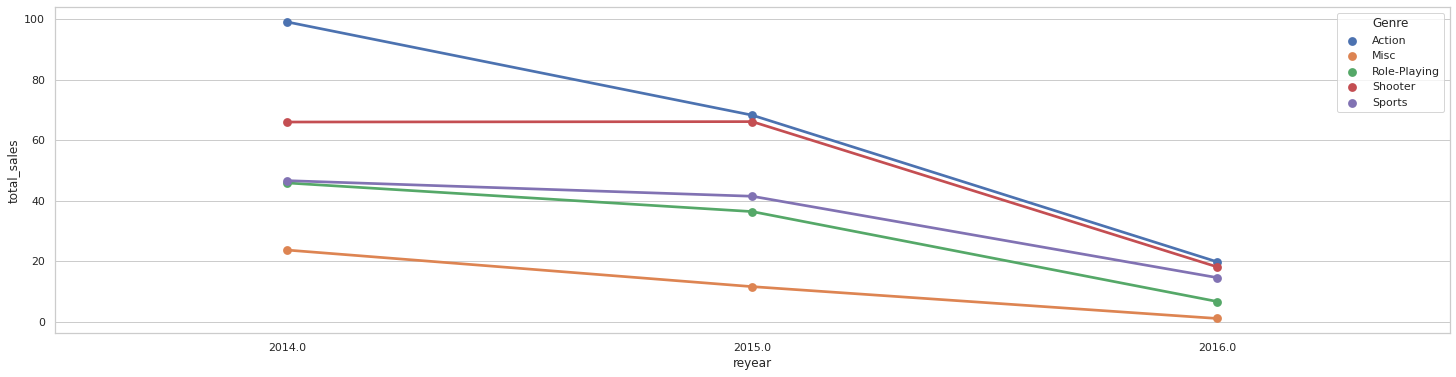

In [137]:
# 최근 3년치 상위 5개의 장르 및 연도별 출고량 추이 시각화
# 시간이 지날수록 출고량이 감소하는 것을 파악
fig, ax = plt.subplots(figsize=(25,6))

sns.pointplot(data=solution, x='reyear', y='total_sales',hue='Genre', ax=ax, ci=None)
 
plt.show()

In [163]:
# 총합 출고량으로 다음 분기의 어떤 장르의 게임을 만드는 것이 좋을지 결정하기 힘듬
# 그래서 일본 지역을 기준으로 장르별 출고량 집계
jp_data = recent_data.groupby(by=['reyear','Genre'], as_index=False)['r_JP_Sales'].sum()
jp_total_sales = jp_data.groupby(by=['Genre'], as_index=False)['r_JP_Sales'].sum().sort_values(by='r_JP_Sales',ascending=False).reset_index(drop=True).iloc[:5]
jp_total_sales

,Genre,r_JP_Sales
0,Role-Playing,28.05
1,Action,27.84
2,Fighting,6.23
3,Misc,5.27
4,Shooter,4.38


In [164]:
jp_solution = jp_data[jp_data['Genre'].isin(top_total_sales.Genre.values)]
jp_solution

,reyear,Genre,r_JP_Sales
0,2014.0,Action,6.50
3,2014.0,Misc,2.36
7,2014.0,Role-Playing,17.71
8,2014.0,Shooter,1.08
10,2014.0,Sports,1.60
12,2015.0,Action,15.56
15,2015.0,Misc,2.10
19,2015.0,Role-Playing,6.71
20,2015.0,Shooter,2.69
22,2015.0,Sports,0.72


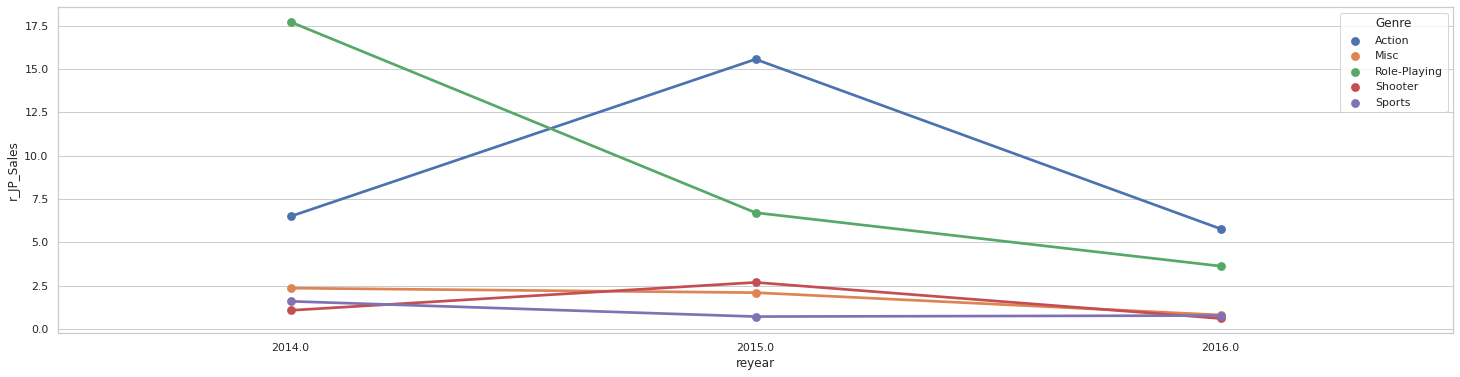

In [165]:
# 최근 3년 일본의 상위 5개의 장르 출고량 변화 추이 시각화
# 지역별로 시각화를 하더라도 시간이 지날수록 출고량이 감소하는 것을 파악할 수 있음
# 최종결론 일본지역의 경우 다음 분기 게임을 제작시 Action 장르로 출시하는 것이 현 데이터상 가장 바람직해보임
fig, ax = plt.subplots(figsize=(25,6))

sns.pointplot(data=jp_solution, x='reyear', y='r_JP_Sales',hue='Genre', ax=ax, ci=None)
 
plt.show()